# Glassdoor DS Intern Assignment
You are the analytics lead on our Jobs Marketplace team, which is responsible for ensuring that customers realize value from Glassdoor's jobs products.  When customers are happy with performance,as measured by the applications they receive, it translates into value for Glassdoor as we are able to retain and grow accounts.

Glassdoor sells a subscription jobs product called Job Slots.  A job slot is like a recurring job posting that customers have access to over the life of the contract.  Customers pay up front and can select from a range of Job Slot packages, 																			
which differ based on the number of slots included.  Customers can swap jobs in and out of the job slot, enabling them to use the posting flexibly as hiring needs change.  While Glassdoor does not guarantee a 																			
specific level of delivery per slot, our ad platform does try to assign an application goal based on a variety of factors (e.g., location, job type, contract size, etc).  Glassdoor traffics job slots using a bidding algorithm 																			
that increases bids when an account is underperforming its application target and lowers bids when it is pacing ahead.  Our search algorithm the surfaces jobs to job seekers based on a combination of relevance and business value (i.e., the bid amount). 																	
																			
Customers evaluate performance based on the number of applications they get vs. the cost-per-application.  The volume and cost a customer realizes ultimately depend on a variety of factors:  the size of the deal,location, industry, roles the employer is trying to fill, the attractiveness of the employer to job-seekers, etc.  We believe that customers decide to renew or not based on the performance factors above, though there likely other reasons.

# Harish Babu Umapathy
# 03/01/2019

### Load Required Python Modules

In [1]:
##Load all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate,train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Read the excel file into Dataframe and change the column names

In [2]:
####Place the data file in the same folder where the notebook is present
xls = pd.ExcelFile('DS_Intern_Assignment.xlsx')
cols=['StartDate','EndDate','EmployerID','EmployerCity','EmployerState','NumberofSlots','PricePaid','DeliveryValue','NumberofApplications','Renewed']
Job_Slot=pd.read_excel(xls, 'Ex 1 - Job Slot Raw Data')
Job_Slot.columns=cols
Job_Slot.head()

,StartDate,EndDate,EmployerID,EmployerCity,EmployerState,NumberofSlots,PricePaid,DeliveryValue,NumberofApplications,Renewed
0,2017-03-14,2017-03-31,29586,na,na,35,1432.0000,3647.67274,204.1,0
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.63018,343.7,0
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.04316,55.9,1
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.61650,7.0,1
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.04228,904.5,1


### Exploratory Data Analysis

In [3]:
##Descriptive Analysis of the data
Job_Slot.describe(include='all')

,StartDate,EndDate,EmployerID,EmployerCity,EmployerState,NumberofSlots,PricePaid,DeliveryValue,NumberofApplications,Renewed
count,3078,3078,3078.000000,3078,3078,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000
unique,476,477,NaN,877,127,NaN,NaN,NaN,NaN,NaN
top,2016-01-01 00:00:00,2016-12-31 00:00:00,NaN,na,na,NaN,NaN,NaN,NaN,NaN
freq,111,122,NaN,834,834,NaN,NaN,NaN,NaN,NaN
first,2015-02-01 00:00:00,2015-04-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-03-14 00:00:00,2017-04-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,34799.923327,NaN,NaN,34.702729,22367.538864,20671.758966,1666.522092,0.678038
std,NaN,NaN,17999.487817,NaN,NaN,27.340419,15606.552445,23772.035373,1756.078335,0.467305
min,NaN,NaN,40.000000,NaN,NaN,10.000000,205.402500,0.859200,0.100000,0.000000
25%,NaN,NaN,22670.250000,NaN,NaN,15.000000,13425.000000,8879.178651,732.225000,0.000000


In [4]:
##Calculate the Slot days which is the job slot contract and the start month when the Slot was subscribed
Job_Slot['Slot_Days']=(Job_Slot['EndDate']-Job_Slot['StartDate']).dt.days
Job_Slot['StartMonth']=Job_Slot['StartDate'].dt.month_name()

In [5]:
print("Number of rows:", Job_Slot.shape[0])
print("Number of columns:", Job_Slot.shape[1])

Number of rows: 3078
Number of columns: 12


In [6]:
Job_Slot.dtypes

StartDate               datetime64[ns]
EndDate                 datetime64[ns]
EmployerID                       int64
EmployerCity                    object
EmployerState                   object
NumberofSlots                    int64
PricePaid                      float64
DeliveryValue                  float64
NumberofApplications           float64
Renewed                          int64
Slot_Days                        int64
StartMonth                      object
dtype: object

In [7]:
Job_Slot.head()

,StartDate,EndDate,EmployerID,EmployerCity,EmployerState,NumberofSlots,PricePaid,DeliveryValue,NumberofApplications,Renewed,Slot_Days,StartMonth
0,2017-03-14,2017-03-31,29586,na,na,35,1432.0000,3647.67274,204.1,0,17,March
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.63018,343.7,0,24,March
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.04316,55.9,1,7,February
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.61650,7.0,1,1,January
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.04228,904.5,1,30,January


## Part 1
### Variation across the Job Slot packages

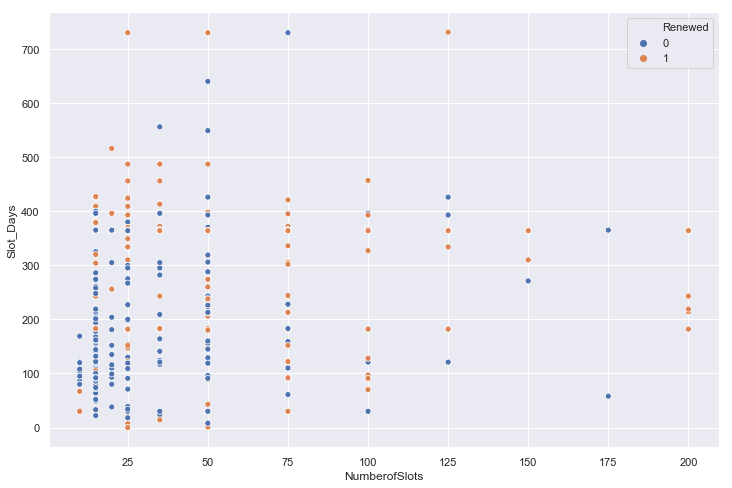

In [8]:
## Scatterplot of numberofslots with the slot_days which is the contract tenure
plt.figure(figsize=(12,8))
sns.set()
sns.scatterplot(x="NumberofSlots", y="Slot_Days",data=Job_Slot,hue="Renewed")

#### Findings: Packages with less slots seems to be quite popular and widely used by customers when compared to packages that provides a greater number of slots. This might be due to the reason of high pricing
#### Customers who have subscribed for close to 1-year package(between 300 and 400) or package with higher slots have more likely renewed the contract
#### Many customers have subscribed the package not for more than one year. This may be due to the fact that customers might want to renew the services on a yearly basis based on the quality of service which the customer gets

## Pricing Distribution

C:\Users\haris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


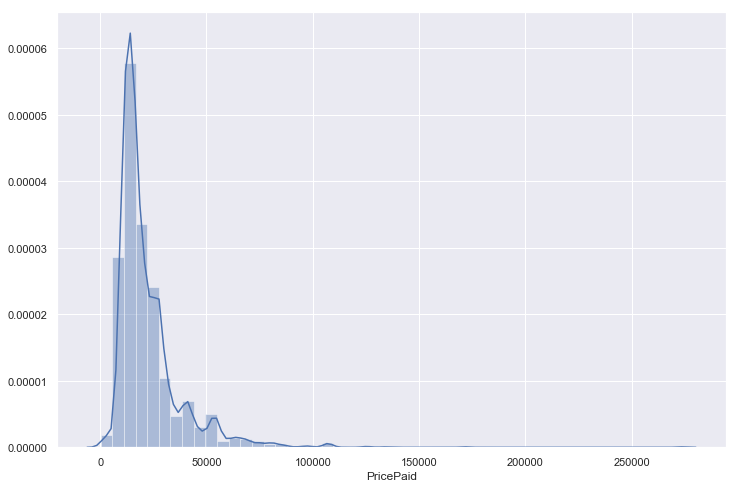

In [9]:
## Distribution plot of Pricing
plt.figure(figsize=(12,8))
sns.distplot(Job_Slot['PricePaid']);

In [10]:
##Normality test & Skewness,Kurtosis results
import scipy
print ("Normality Test:",scipy.stats.normaltest(Job_Slot['PricePaid']))
print ("Skewness:",scipy.stats.skew(Job_Slot['PricePaid']))
print ("Kurtosis:",scipy.stats.kurtosis(Job_Slot['PricePaid']))

Normality Test: NormaltestResult(statistic=2594.902642590979, pvalue=0.0)
Skewness: 3.7030542394016694
Kurtosis: 30.80575368941021


##### Based on the skewness and kurtosis results, it is evident that the distribution of the data is more heavily right skewed and the distribution has more outliers due to which the distribution has a Sharper peak than Bell Shaped(Also known as Leptokurtic)
##### Normality test results shows that the distribution doesn't follow normality.Concluded based on P-Value.

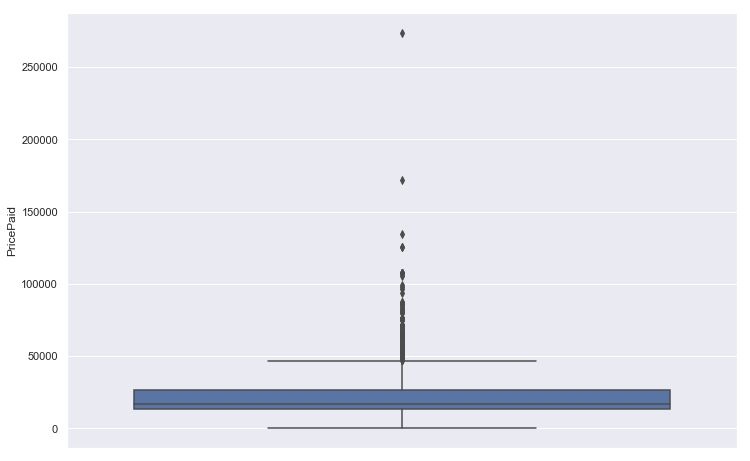

In [11]:
##Outlier detection using boxplots
plt.figure(figsize=(12,8))
ax = sns.boxplot(y="PricePaid", data=Job_Slot)

In [13]:
##Total Number of Outliers data
Job_Slot[Job_Slot['PricePaid']>=50000].shape[0]

196

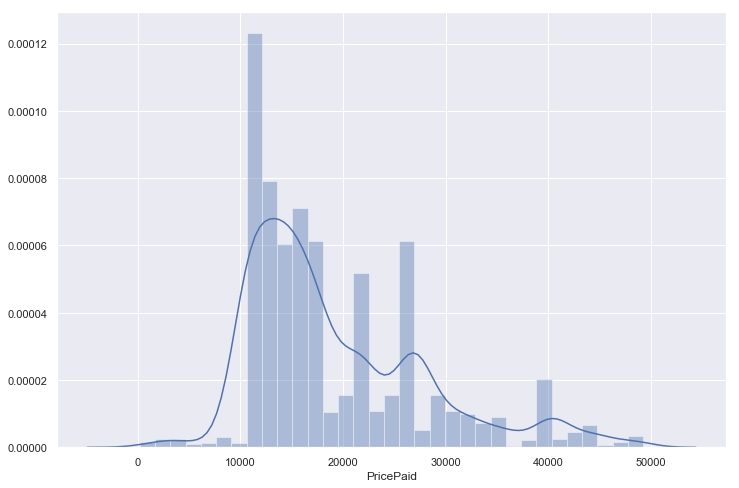

In [12]:
##Distribution Plot of Pricing without Outliers
plt.figure(figsize=(12,8))
sns.distplot(Job_Slot[Job_Slot['PricePaid']<50000]['PricePaid']);

#### Findings
#### After removing the outliers(196 rows), the distribution has no more sharper peak and still its right skewed.Most of the price paid is in the range of 10000 to 25000.
#### The hypothesis: The PricePaid is asymmetrically distributed and they are not random. If there were random, we would have a (symmetric) Gaussian distribution.

### Most Popular Packages,based on number of slots

In [14]:
##Get the Unique Number of Slots
Slots_Range=Job_Slot['NumberofSlots'].unique()
list(Slots_Range)

[35, 25, 50, 10, 15, 75, 100, 20, 200, 125, 150, 175]

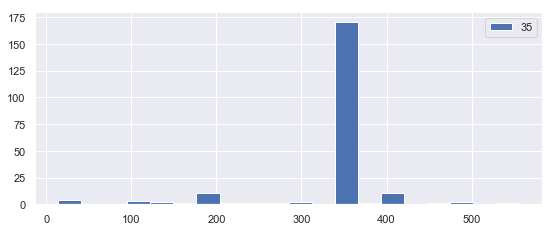

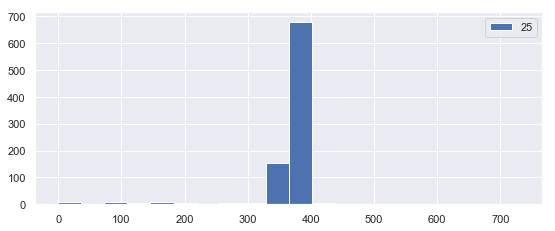

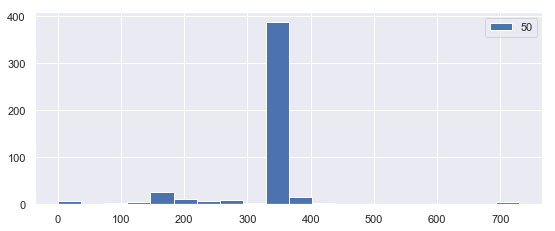

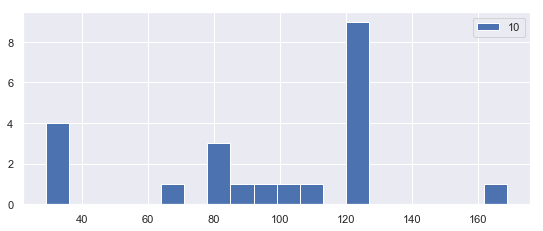

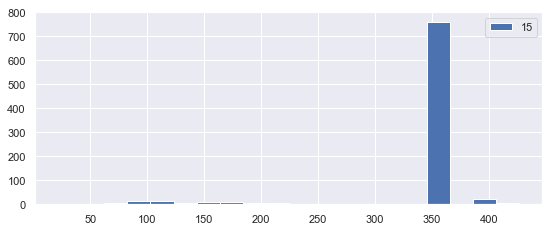

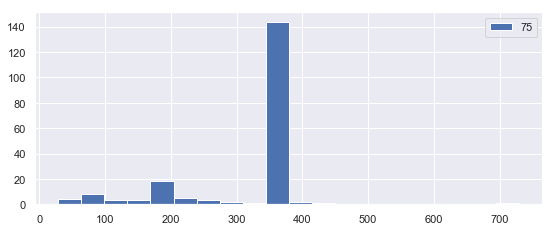

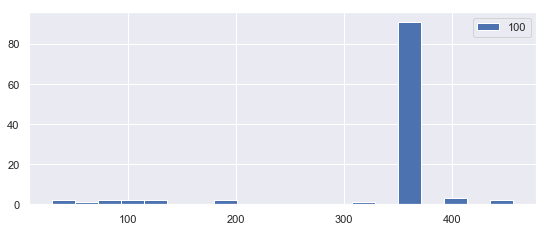

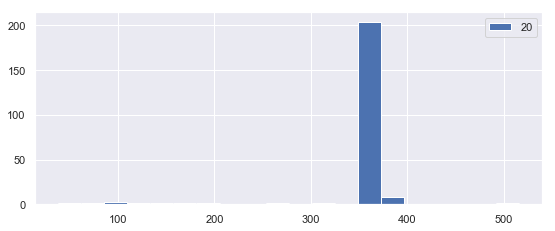

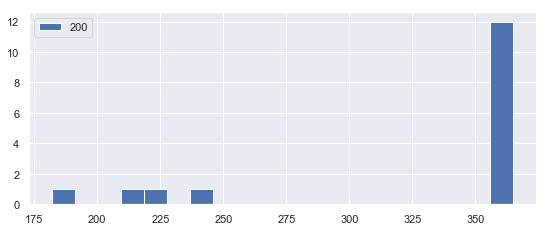

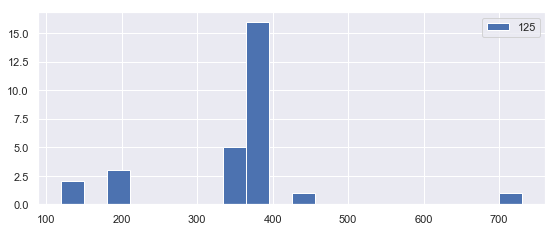

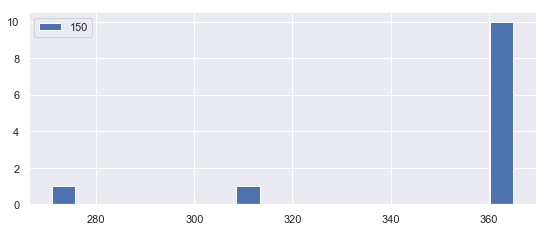

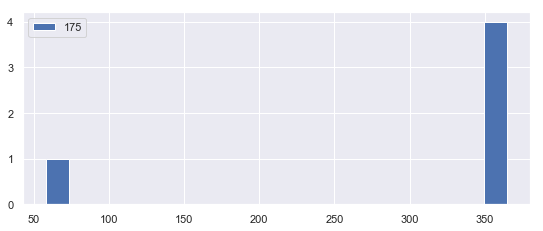

<Figure size 1440x864 with 0 Axes>

In [15]:
## Histogram of Most Popular Packages based on the number of Slots
plt.rcParams["figure.figsize"] = [20,12]
j=0
for i in list(Slots_Range):
    j=1+1
    plt.subplot(3,2,j)
    plt.hist(Job_Slot[Job_Slot['NumberofSlots']==i]['Slot_Days'],bins = 20,label =i)
    plt.legend()
    plt.show()
    plt.savefig('Popular')

#### Findings
#### The histogram Cleary represents a very interesting insights regarding the packages available in Job Slot. Most Customers have subscribed for 1-year packages irrespective of the number of slots provided to them in the package.
#### Except for the package with NumberofSlots-10,rest all the packages share a common trend of being subscribed for 1 year

## Term Length Variation
#### Term length is the number of days the customer has subscribed to the job slot.

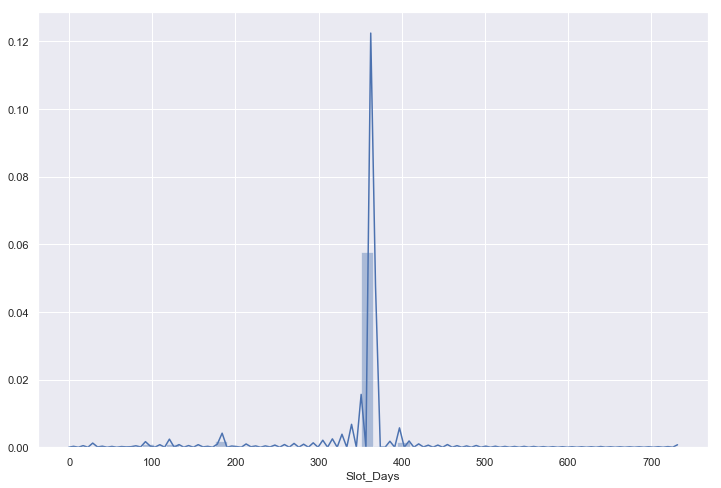

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(Job_Slot['Slot_Days'])

In [17]:
## Term Length Descriptive Analysis
Job_Slot['Slot_Days'].describe()

count    3078.000000
mean      344.942170
std        74.081694
min         0.000000
25%       364.000000
50%       365.000000
75%       365.000000
max       731.000000
Name: Slot_Days, dtype: float64

### Findings
#### The Term Length variation ranges up to 2 years. Based on the descriptive analysis and distribution plot, we can say that the higher number of customers tend to subscribe for 1 year.
#### This is clearly proved by the descriptive analysis where the interquartile range tells how spread the middle values and also called as mid spread or middle 50%.
#### The IQR is often seen as a better measure of spread than the range as it is not affected by outliers and explains 50% of data.
#### Mean=344, 25%=364,50%=365,75%=365

## Performance Metrics
#### Average price per application can be considered as one of the performance metrics to assess the overall delivery performance across customers
#### Total Number of applications delivered over the course of the contract is one of the very good factors but it doesn't take into the consideration the additional cost the customer spends for bids.
#### Average price per application=Market Place value Delivered/Number of Applications
#### Lower the average price per application signifies that the customer has spent very less additional amount overall for the number of applications they received for a cumulative amount of time

In [18]:
##Calculated the average price per application of each customers
Job_Slot['Average_Price_Per_Application']=Job_Slot['DeliveryValue']/ Job_Slot['NumberofApplications']

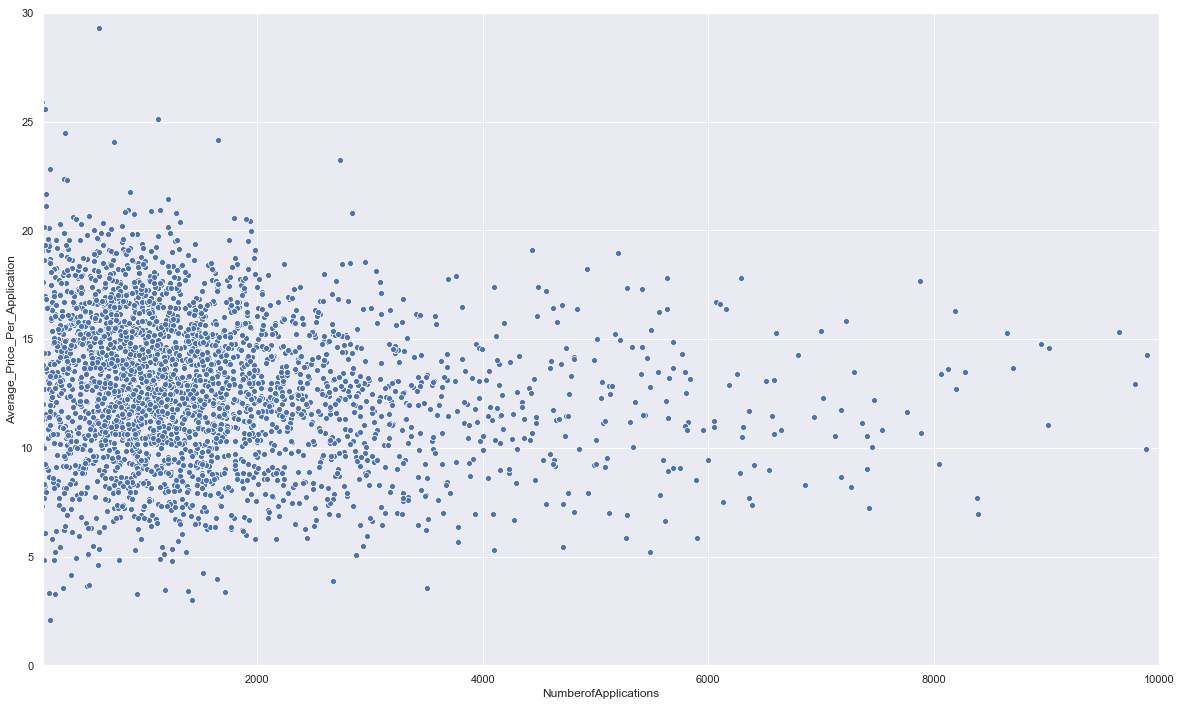

In [19]:
## Average Price Per Application Vs Number Of Applications
plt.ylim(0,30)
plt.xlim(100,10000)
sns.scatterplot(y="Average_Price_Per_Application", x="NumberofApplications", data=Job_Slot)

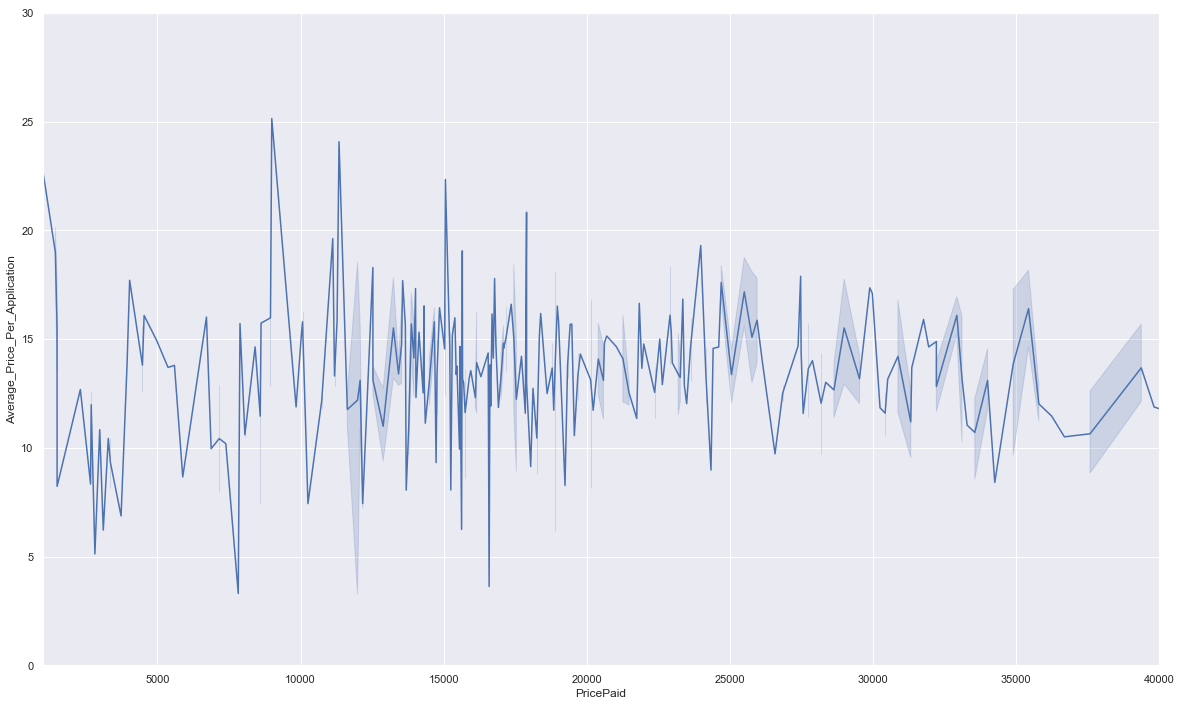

In [20]:
## Average Price Per Application Vs Price Paid for the Package
plt.ylim(0,30)
plt.xlim(1000,40000)
sns.lineplot(y="Average_Price_Per_Application", x="PricePaid", data=Job_Slot)

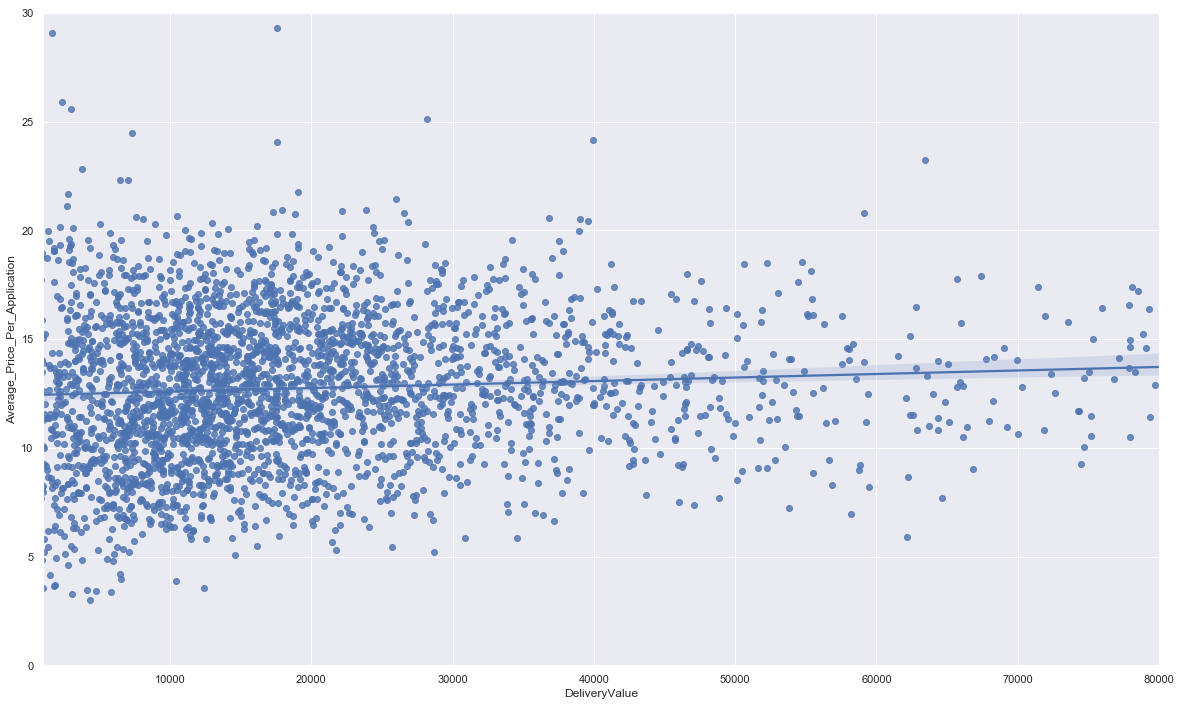

In [21]:
## Average Price Per Application Vs Delivery Value
plt.ylim(0,30)
plt.xlim(1000,80000)
sns.regplot(y="Average_Price_Per_Application", x="DeliveryValue", data=Job_Slot)

### Findings
##### Average Price Per Application Vs Number of Applications
*	Average Price raises as the number of applications increases but as the number of application increases, it becomes stagnant and ranges from 10 to 15 dollar on an average 
##### Average Price Per Application Vs Price Paid for the Package
*	Customers who paid more for the package has lower average price per application. This is because of higher applications the customers are receiving.
##### Average Price Per Application Vs Delivery Value
*	Average Price raises as the marketplace value increases but as the number of application increases, it becomes stagnant and ranges from 10 to 15 dollar on an average


## Part 2
## Retention Analysis

In [22]:
##Remove all the na rows and 0 rows in the dataset
Job_Slot=Job_Slot[Job_Slot['EmployerState']!='na']
Job_Slot=Job_Slot[Job_Slot['EmployerState']!=0]

### Data Preprocessing

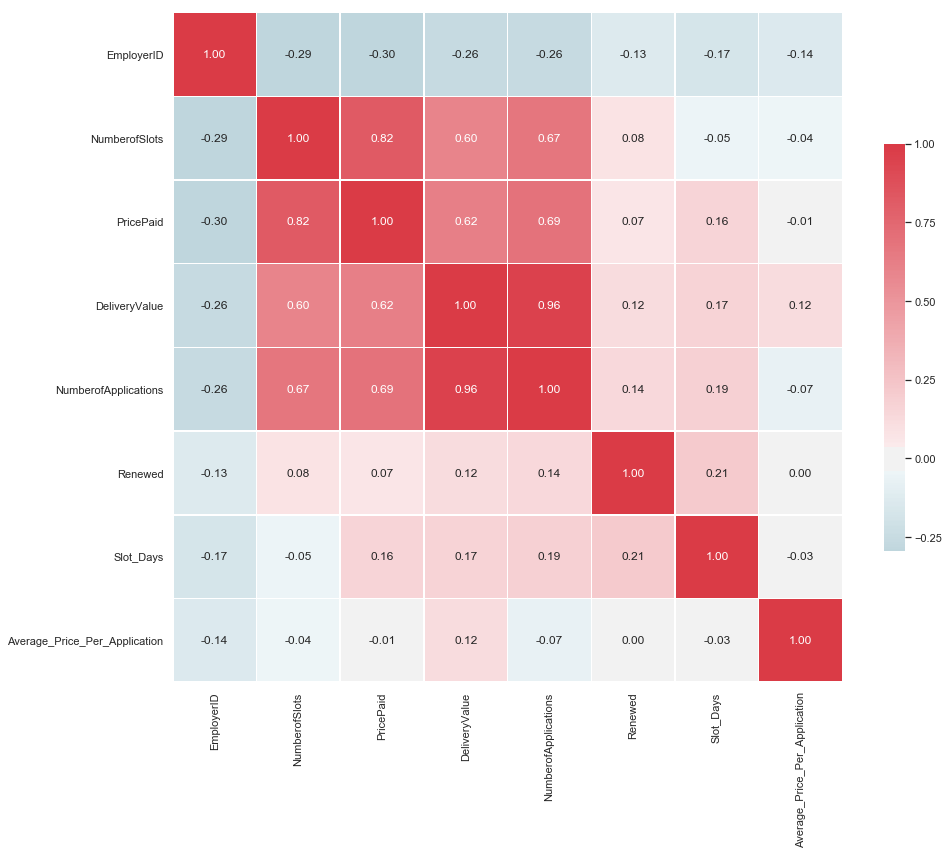

In [23]:
##Correlation Analysis using Heatmap
corr=Job_Slot.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,  vmax=1, center=0,annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Findings 
There is a strong correlation between Deliveryvalue(Marketplace value delivered) and the number of applications.
Price paid is having the strong positive relationship with the number of slots.
There occurs some moderate positive relationship between other variables deliveryvalue,numberofslots,pricepaid and number of applications.
Removing the highly correlated values like Delivery value will help improve the model accuracy.

In [24]:
## Converted the EmployerState and StartMonth categorical variables into dummy values to efficiently use in modelling
state_dummies = pd.get_dummies(Job_Slot['EmployerState'])
month_dummies = pd.get_dummies(Job_Slot['StartMonth'])
Job_Slot=Job_Slot.join(state_dummies)
Job_Slot=Job_Slot.join(month_dummies)

In [25]:
Job_Slot.head()

,StartDate,EndDate,EmployerID,EmployerCity,EmployerState,NumberofSlots,PricePaid,DeliveryValue,NumberofApplications,Renewed,...,December,February,January,July,June,March,May,November,October,September
1,2017-03-07,2017-03-31,56308,Portland,Oregon,35,2685.0000,4393.63018,343.7,0,...,0,0,0,0,0,1,0,0,0,0
2,2017-02-03,2017-02-10,29676,Springfield,Massachusetts,25,255.9700,1626.04316,55.9,1,...,0,1,0,0,0,0,0,0,0,0
3,2017-01-10,2017-01-11,7740,Tenafly,New Jersey,50,205.4025,145.61650,7.0,1,...,0,0,1,0,0,0,0,0,0,0
4,2017-01-05,2017-02-04,12693,Kingston,Ontario,50,3728.5700,6214.04228,904.5,1,...,0,0,1,0,0,0,0,0,0,0
5,2016-12-01,2016-12-31,49482,Toronto,Ontario,10,1491.0700,109.92032,6.2,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
##Removed all unwanted variables and variables with strong correlation
X=Job_Slot.drop(['Renewed','EmployerID','EmployerCity','EmployerState','StartDate','EndDate','StartMonth','DeliveryValue'],axis=1)
y=Job_Slot['Renewed']

# Predictive Modelling

In [27]:
## Train-Test Split of the dataset.ratio 60-40 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4) # test size = 0.4, hence 60-40 split.
X_test.head()

,NumberofSlots,PricePaid,NumberofApplications,Slot_Days,Average_Price_Per_Application,Al Asimah,Alabama,Alaska,Alberta,Andalusia,...,December,February,January,July,June,March,May,November,October,September
579,25,21480.0,1250.1,365,10.261619,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1322,50,40275.0,2250.0,396,9.952228,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2346,20,16110.0,809.6,365,13.349416,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1377,50,35800.0,2339.7,365,8.314407,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2495,15,10740.0,432.1,365,15.246293,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
## Function to print Classification Report for the predictions
from sklearn.metrics import classification_report,roc_curve, auc,roc_auc_score,accuracy_score
from pandas_ml import ConfusionMatrix
def Clasification_Report(y_test,y_pred):
    print ("\n Classification report : \n",classification_report(y_test,y_pred))
    print ("Accuracy Score   : ",accuracy_score(y_test,y_pred))
    conf_matrix = ConfusionMatrix(y_test,y_pred) 
    print ("\n " ,conf_matrix)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr, tpr)    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()  

### Logistic Regression

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.10      0.18       285
           1       0.70      0.99      0.82       605

   micro avg       0.70      0.70      0.70       890
   macro avg       0.73      0.54      0.50       890
weighted avg       0.72      0.70      0.61       890

Accuracy Score   :  0.702247191011236

  Predicted  False  True  __all__
Actual                         
False          2   110      112
True           6   172      178
__all__        8   282      290


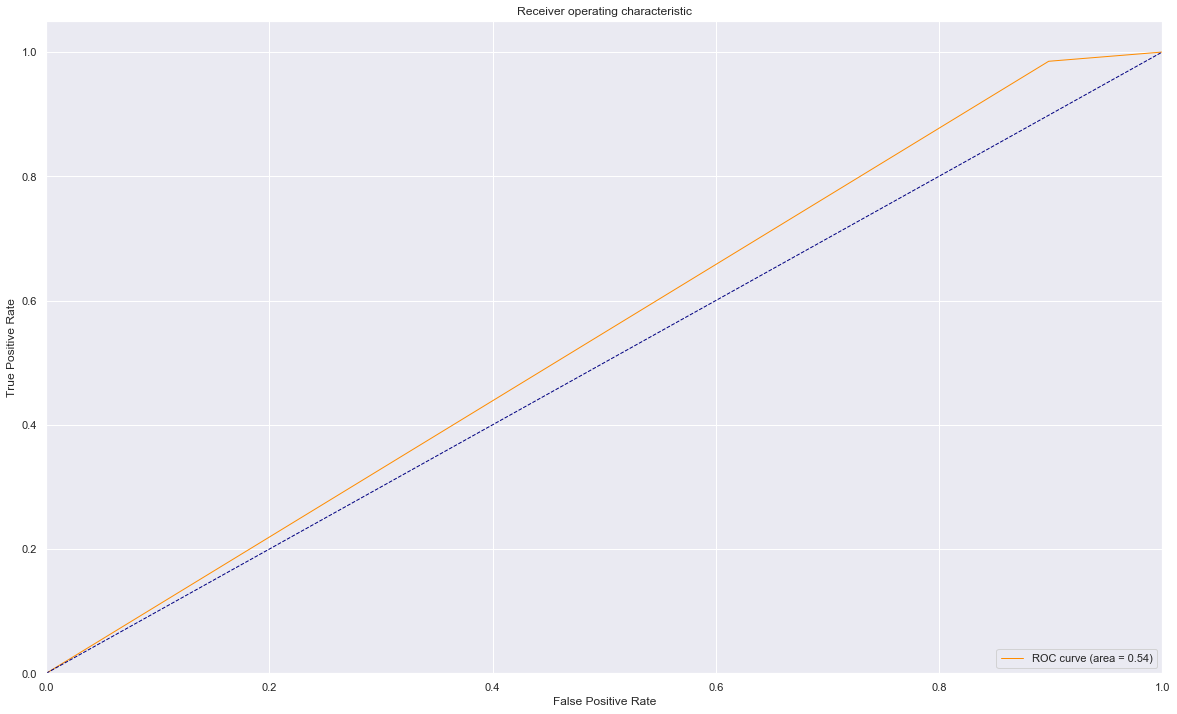

In [29]:
##Built Logistic Regression Model and calculated the Accuracy Score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
Clasification_Report(y_test,y_pred)
roc_log=roc_auc_score(y_test,y_pred)

### RandomForest Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.4s finished



 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.19      0.29       285
           1       0.72      0.96      0.82       605

   micro avg       0.71      0.71      0.71       890
   macro avg       0.71      0.57      0.56       890
weighted avg       0.71      0.71      0.65       890

Accuracy Score   :  0.7146067415730337

  Predicted  False  True  __all__
Actual                         
False          6   106      112
True          19   159      178
__all__       25   265      290


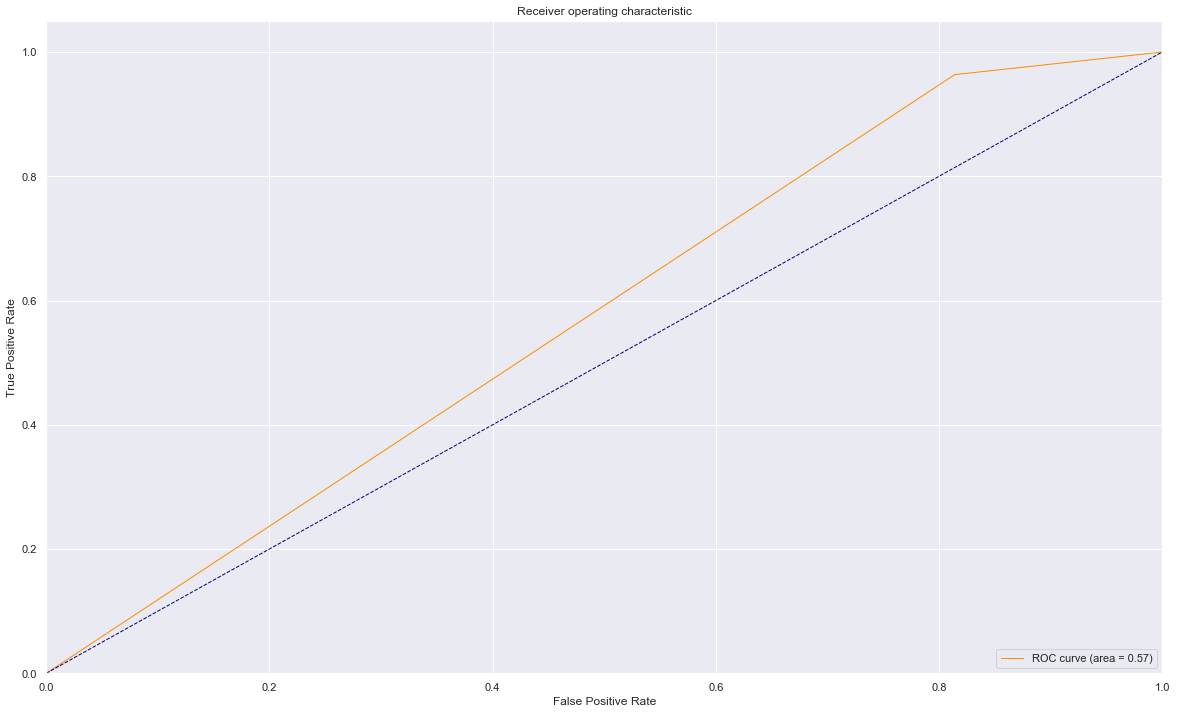

In [30]:
##Build RandomForestClassifier with cross-validation technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=678)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Create grid search object
rf_cv = RandomizedSearchCV(rf, param_distributions = random_grid, cv = 5, verbose=True, n_jobs=-1)
rf_fit = rf_cv.fit(X_train,y_train)
best_rf=rf_fit.best_estimator_
y_pred=best_rf.predict(X_test)
Clasification_Report(y_test,y_pred)
roc_rf=roc_auc_score(y_test,y_pred)

### XGBoost Classifier

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.8s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished



 Classification report : 
               precision    recall  f1-score   support

           0       0.68      0.18      0.28       285
           1       0.71      0.96      0.82       605

   micro avg       0.71      0.71      0.71       890
   macro avg       0.70      0.57      0.55       890
weighted avg       0.70      0.71      0.65       890

Accuracy Score   :  0.7101123595505618

  Predicted  False  True  __all__
Actual                         
False          6   106      112
True          18   160      178
__all__       24   266      290


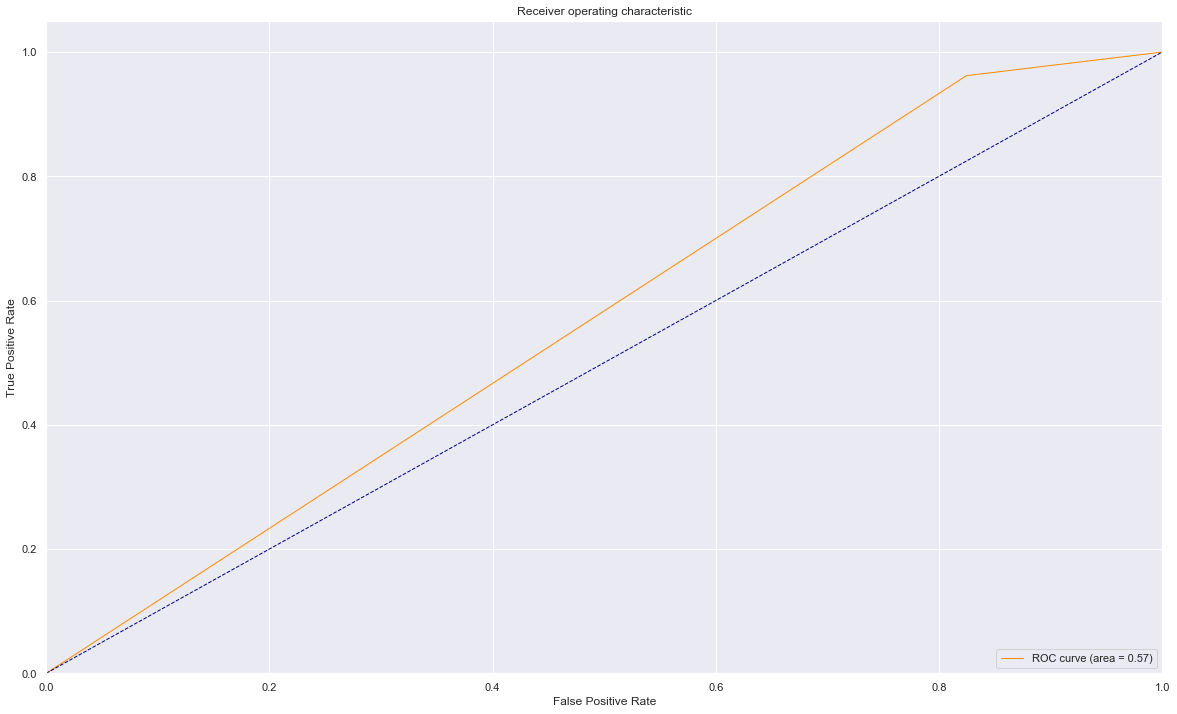

In [31]:
##ExtremeGradient Boosting with 5 fold cross validation using RandomizedSearchCV
import xgboost as xgb
xg_reg = xgb.XGBClassifier(silent=True, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
gs_xgbcv= RandomizedSearchCV(xg_reg,param_distributions={}, cv=5, verbose=10, n_jobs=-1)
gs_xgbcv.fit(X_train, y_train)
best_xgb=gs_xgbcv.best_estimator_
y_pred=best_xgb.predict(X_test)
Clasification_Report(y_test,y_pred)
roc_xgb=roc_auc_score(y_test,y_pred)

## Model Summary

In [32]:
d = {'Model':['Logistic Regression','Random Forest','XgBoost'],'AUC': [roc_log,roc_rf,roc_xgb]}
df = pd.DataFrame(data=d)
df

,Model,AUC
0,Logistic Regression,0.543439
1,Random Forest,0.574801
2,XgBoost,0.568711


## Feature Importance Analysis
#### Based on Model Summary,RandomForest and XGBoost performed better than Logistic Regression.So,Let's plot the feature importance of these models.

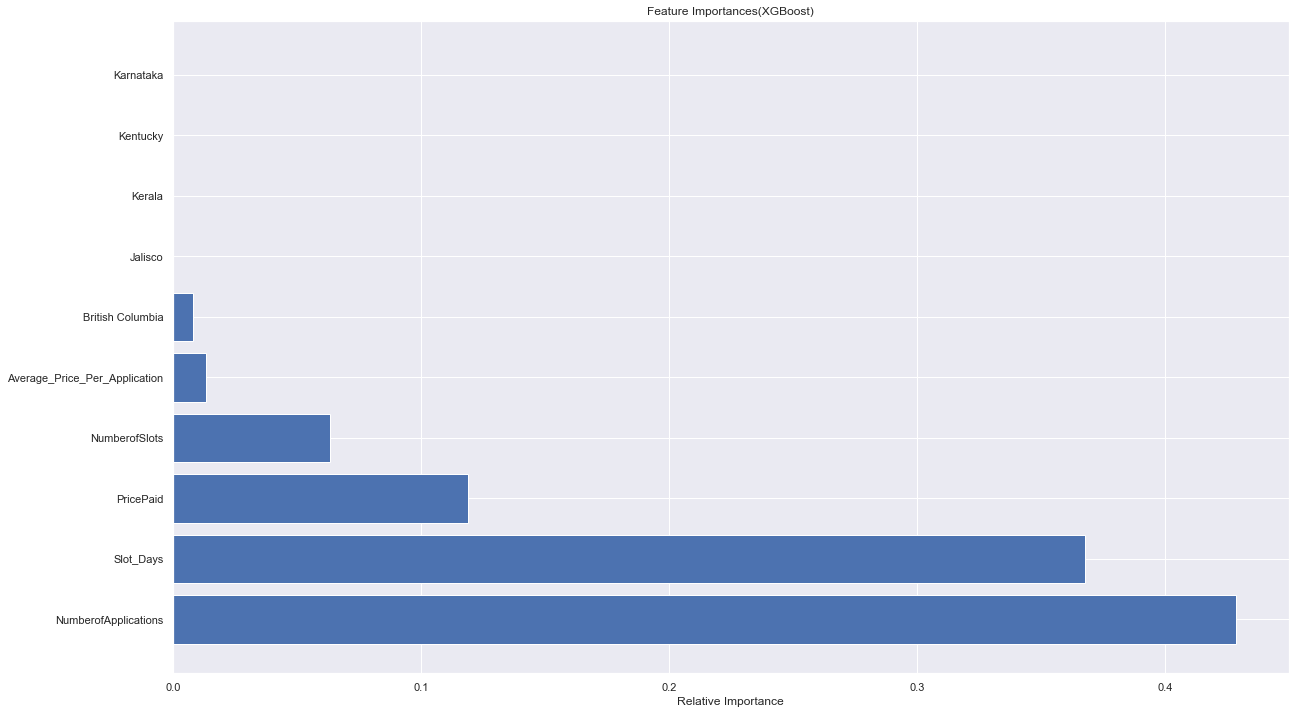

In [33]:
## Feature Importance of XGBoost Model
importances_xgb = best_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
indices_xgb=indices_xgb[:10]
plt.title('Feature Importances(XGBoost)')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align='center')
plt.yticks(range(len(indices_xgb)), [X_train.columns[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()

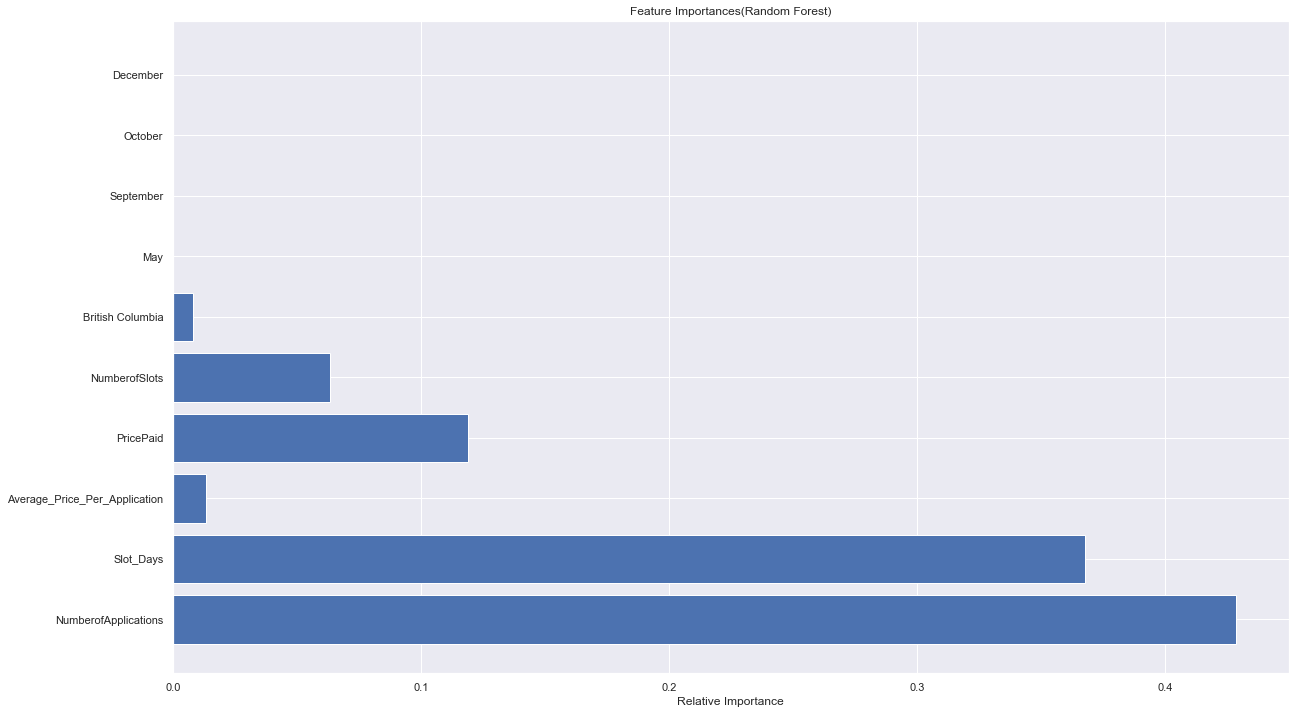

In [34]:
## Feature Importance of random forest model
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
indices_rf=indices_rf[:10]
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices_rf)), importances_xgb[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [X_train.columns[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
Important_Features=set([X_train.columns[i] for i in indices_rf]) | set([X_train.columns[i] for i in indices_xgb])
X_trains=X_train.filter(items=['NumberOfApplications','Slot_Days','AveragePricePerApplication','PricePaid','NumberofSlots'])
X_tests=X_test.filter(items=['NumberOfApplications','Slot_Days','AveragePricePerApplication','PricePaid','NumberofSlots'])

#### Findings
Both the RandomForest and XGBoost predicted a similar AUC score and has used similar variables for model building
NumberOfApplications,Slot_Days,AveragePricePerApplication,PricePaid,NumberofSlots --> these are the variables of high importance

#### XGBoost Model with feature importance variables


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.13      0.22       285
           1       0.71      0.99      0.82       605

   micro avg       0.71      0.71      0.71       890
   macro avg       0.76      0.56      0.52       890
weighted avg       0.74      0.71      0.63       890

Accuracy Score   :  0.7123595505617978

  Predicted  False  True  __all__
Actual                         
False          5   107      112
True           7   171      178
__all__       12   278      290


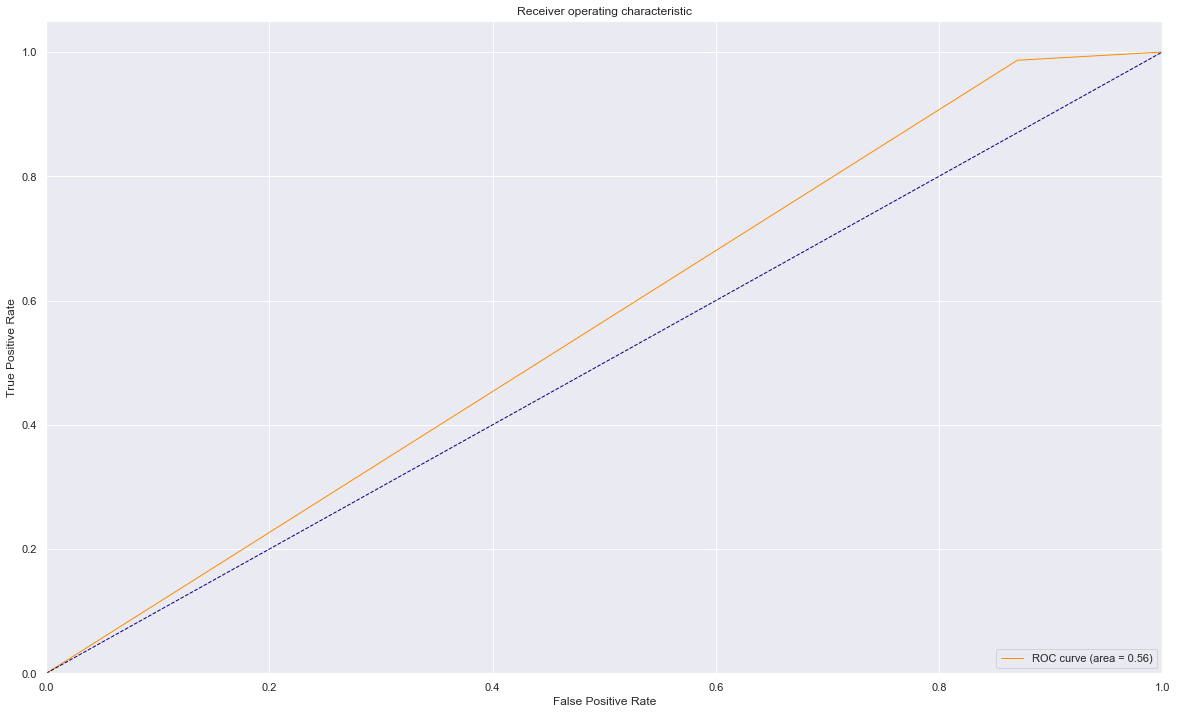

In [36]:
best_xgb.fit(X_trains,y_train)
y_pred=best_xgb.predict(X_tests)
Clasification_Report(y_test,y_pred)

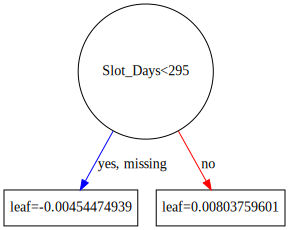

In [37]:
##Tree Visualization of XGBoost Model
xgb.to_graphviz(best_xgb,num_trees=7)

#### RandomForest Model with feature importance variables


 Classification report : 
               precision    recall  f1-score   support

           0       0.57      0.18      0.27       285
           1       0.71      0.94      0.81       605

   micro avg       0.69      0.69      0.69       890
   macro avg       0.64      0.56      0.54       890
weighted avg       0.66      0.69      0.63       890

Accuracy Score   :  0.6932584269662921

  Predicted  False  True  __all__
Actual                         
False          8   104      112
True          20   158      178
__all__       28   262      290


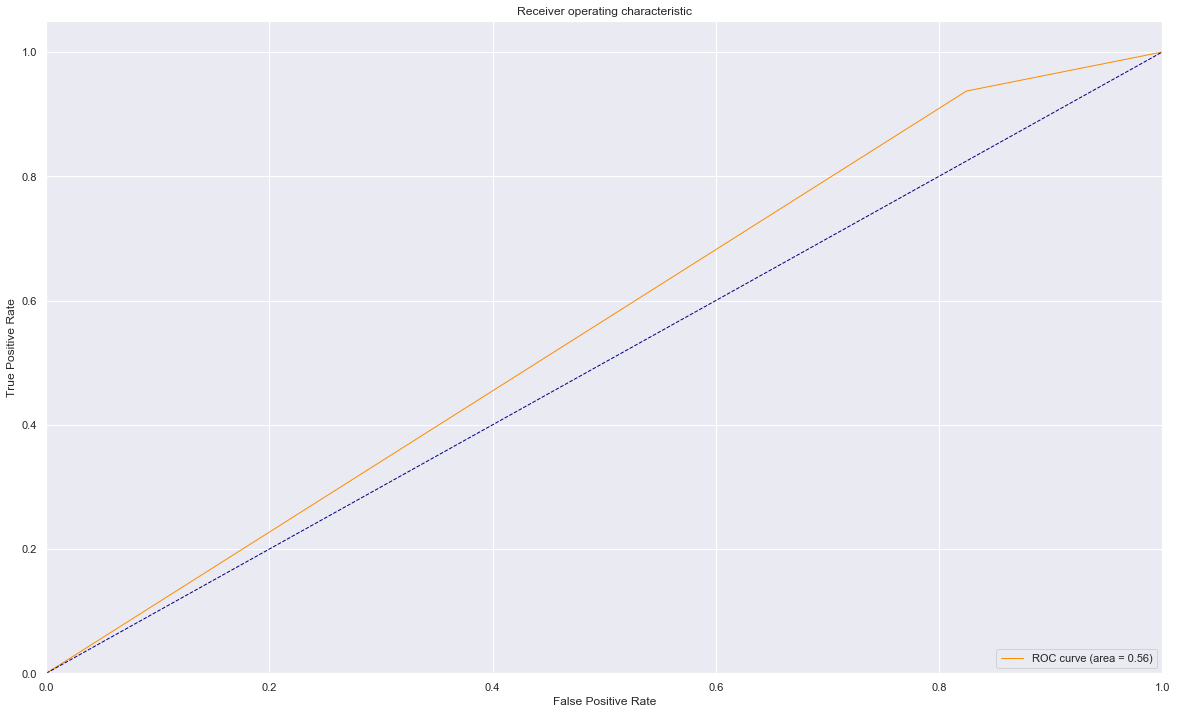

In [38]:
best_rf.fit(X_trains,y_train)
y_pred=best_rf.predict(X_tests)
Clasification_Report(y_test,y_pred)

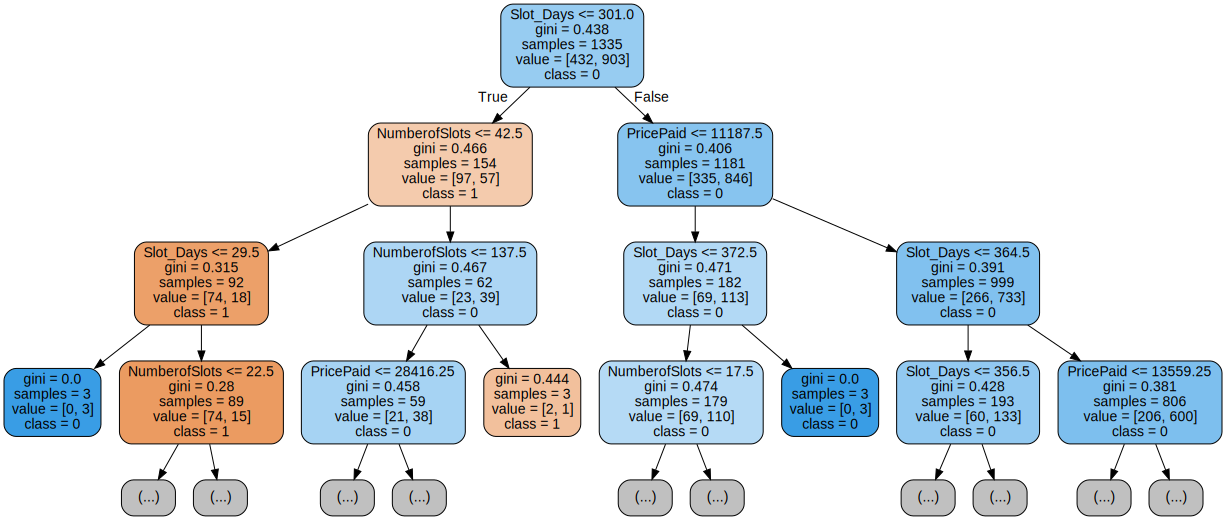

In [39]:
##Install the library in the conda environment to visualize the graph.
from graphviz import Source
from sklearn import tree
estimated_tree = best_rf[5]

graph = Source(tree.export_graphviz(estimated_tree,out_file=None,max_depth=3,
                                        rounded=True,proportion = False,
                                        feature_names = X_trains.columns, 
                                        filled=True,
                                        class_names=["1","0"]                    
                                       ))
display(graph)

In [40]:
with open("RandomForest.dot", "w") as f:
    f = tree.export_graphviz(estimated_tree, out_file=f,max_depth=4,
                                        rounded=True,proportion = False,
                                        feature_names = X_trains.columns, 
                                        filled=True,
                                        class_names=["1","0"] )
! dot -Tpdf RandomForest.dot -o RandomForest.pdf